# **Hpothesis Testing**

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly


#Scipy
from scipy import stats
from scipy.stats import norm, pearsonr
import statsmodels.api as sm

# Warnings 
import warnings 
warnings.filterwarnings("ignore")

# **Loading The Data**

In [2]:
# Loading the NYC Restaurant Data 
rd = pd.read_csv('rd')

In [3]:
# Loading the Yelp Data for NYC Restaurant Data 
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data Check 
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209789 entries, 0 to 209788
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  209789 non-null  int64  
 1   DBA                    209165 non-null  object 
 2   BORO                   209789 non-null  object 
 3   BUILDING               209481 non-null  object 
 4   STREET                 209783 non-null  object 
 5   ZIPCODE                207093 non-null  float64
 6   CUISINE DESCRIPTION    207365 non-null  object 
 7   INSPECTION DATE        209789 non-null  object 
 8   ACTION                 207365 non-null  object 
 9   VIOLATION CODE         206208 non-null  object 
 10  VIOLATION DESCRIPTION  206208 non-null  object 
 11  CRITICAL FLAG          209789 non-null  object 
 12  SCORE                  199793 non-null  float64
 13  GRADE                  102961 non-null  object 
 14  GRADE DATE             94208 non-nul

In [5]:
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         848 non-null    object 
 1   name          848 non-null    object 
 2   image_url     848 non-null    object 
 3   url           848 non-null    object 
 4   review_count  848 non-null    int64  
 5   categories    848 non-null    object 
 6   rating        848 non-null    float64
 7   coordinates   848 non-null    object 
 8   transactions  848 non-null    object 
 9   location      848 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.4+ KB


# **Data Cleaning**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rd[rd['BORO'].str.lower()=='brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description 
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower()=='pizza')]

In [8]:
# Filtering out rows with NAN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Take a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                     DBA      BORO BUILDING  \
181     40616509               MONTY Q'S  Brooklyn      158   
211     41675367            J-M PIZZA II  Brooklyn     1323   
578     41296556        ENOTECA ON COURT  Brooklyn      347   
668     50047483          LOVE AND DOUGH  Brooklyn       68   
1002    50073372  PINO'S PIZZA AND GRILL  Brooklyn     2025   
...          ...                     ...       ...      ...   
208269  40396492      ROYAL KING'S PIZZA  Brooklyn     5211   
208503  41674167            FRANKS PIZZA  Brooklyn     8025   
209492  50033400        PALACE ON FULTON  Brooklyn     1882   
209504  50140484           MUNDO'S PIZZA  Brooklyn       25   
209771  50041320  A & L PIZZA RESTAURANT  Brooklyn     6024   

                   STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
181       MONTAGUE STREET  11201.0               Pizza      07/19/2022   
211              AVENUE U  11229.0               Pizza      01/06/2022   
578          COURT ST

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge 
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the resaurants 
mdf = pd.merge(pizza_brooklyn_subset, ydf,left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows 
mdf.drop_duplicates (inplace=True)

#Display the merged dataframe
print ("\nMerged DataFrame")
print(mdf)


Merged DataFrame
        CAMIS                          DBA      BORO BUILDING  \
0    50004166            UNION PIZZA WORKS  Brooklyn      423   
1    50004166            UNION PIZZA WORKS  Brooklyn      423   
2    41672156           WILLIAMSBURG PIZZA  Brooklyn      265   
3    41672156           WILLIAMSBURG PIZZA  Brooklyn      265   
4    50114346           WILLIAMSBURG PIZZA  Brooklyn      259   
..        ...                          ...       ...      ...   
514  40745618                 MIKE'S PIZZA  Brooklyn      905   
515  40745618                 MIKE'S PIZZA  Brooklyn      905   
516  50088788  L'ARTE DELLA PIZZA BROOKLYN  Brooklyn      172   
517  50088788  L'ARTE DELLA PIZZA BROOKLYN  Brooklyn      172   
518  50000967                      WHEATED  Brooklyn      905   

              STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0    TROUTMAN STREET  11237.0               Pizza      10/25/2022   
1    TROUTMAN STREET  11237.0               Pizza      10/25/20

In [12]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  519 non-null    int64   
 1   DBA                    519 non-null    object  
 2   BORO                   519 non-null    object  
 3   BUILDING               519 non-null    object  
 4   STREET                 519 non-null    object  
 5   ZIPCODE                515 non-null    float64 
 6   CUISINE DESCRIPTION    519 non-null    object  
 7   INSPECTION DATE        519 non-null    object  
 8   ACTION                 519 non-null    object  
 9   VIOLATION CODE         517 non-null    object  
 10  VIOLATION DESCRIPTION  517 non-null    object  
 11  CRITICAL FLAG          519 non-null    object  
 12  SCORE                  519 non-null    float64 
 13  GRADE                  519 non-null    object  
 14  GRADE DATE             512 non-null    obj

In [13]:
# Dropping irelevant column
mdf.drop(['_merge'], axis=1, inplace=True)

In [14]:
mdf.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,alias,name,image_url,url,review_count,categories,rating,coordinates,transactions,location
0,50004166,UNION PIZZA WORKS,Brooklyn,423,TROUTMAN STREET,11237.0,Pizza,10/25/2022,Violations were cited in the following area(s).,08A,...,union-pizza-works-brooklyn,UNION PIZZA WORKS,https://s3-media1.fl.yelpcdn.com/bphoto/SNLXLQ...,https://www.yelp.com/biz/union-pizza-works-bro...,297,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 40.7073067, 'longitude': -73.922154}","['pickup', 'delivery']","{'address1': '423 Troutman St', 'address2': ''..."
1,50004166,UNION PIZZA WORKS,Brooklyn,423,TROUTMAN STREET,11237.0,Pizza,10/25/2022,Violations were cited in the following area(s).,04N,...,union-pizza-works-brooklyn,UNION PIZZA WORKS,https://s3-media1.fl.yelpcdn.com/bphoto/SNLXLQ...,https://www.yelp.com/biz/union-pizza-works-bro...,297,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 40.7073067, 'longitude': -73.922154}","['pickup', 'delivery']","{'address1': '423 Troutman St', 'address2': ''..."
2,41672156,WILLIAMSBURG PIZZA,Brooklyn,265,UNION AVENUE,11211.0,Pizza,11/02/2022,Violations were cited in the following area(s).,06C,...,williamsburg-pizza-brooklyn-6,WILLIAMSBURG PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/WsjRUp...,https://www.yelp.com/biz/williamsburg-pizza-br...,367,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.0,"{'latitude': 40.7078768, 'longitude': -73.9507...","['delivery', 'pickup']","{'address1': '265 Union Ave', 'address2': '', ..."
3,41672156,WILLIAMSBURG PIZZA,Brooklyn,265,UNION AVENUE,11211.0,Pizza,11/02/2022,Violations were cited in the following area(s).,06C,...,williamsburg-pizza-new-york-7,WILLIAMSBURG PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/AeirIq...,https://www.yelp.com/biz/williamsburg-pizza-ne...,284,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.71822, 'longitude': -73.99123}","['delivery', 'pickup']","{'address1': '277 Broome St', 'address2': '', ..."
4,50114346,WILLIAMSBURG PIZZA,Brooklyn,259,WYCKOFF AVENUE,11237.0,Pizza,07/10/2023,Violations were cited in the following area(s).,10F,...,williamsburg-pizza-brooklyn-6,WILLIAMSBURG PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/WsjRUp...,https://www.yelp.com/biz/williamsburg-pizza-br...,367,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.0,"{'latitude': 40.7078768, 'longitude': -73.9507...","['delivery', 'pickup']","{'address1': '265 Union Ave', 'address2': '', ..."


## **Hypothesis Test 1**

**Try to find a correlation between scores on inspections and the ratings on Yelp**


 - The null hypothesis for this question would be that the restaurant inspection score and grade does not significantly affect the rating reviews on Yelp for pizza restaurants in Brooklyn NY.
 
  - The alternative hypothesis for this question would be that the restaurant inspection score and grade does affect the rating reviews on Yelp for the pizza restaurants in Brooklyn NY. 

In [15]:
# Select the columns of interest
selected_columns = ['SCORE', 'rating']
subset_df = mdf[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

           SCORE    rating
SCORE   1.000000  0.154637
rating  0.154637  1.000000


In [16]:
# Perform Pearson correlation test 
correlation, p_value = pearsonr(mdf['SCORE'], mdf['rating'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: 0.15
P-value: 0.0004
The correlation is statistically significant.


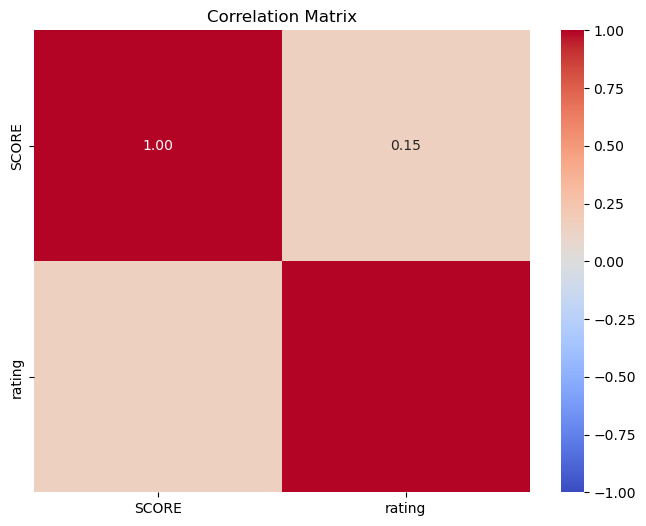

In [18]:
# Select the columns of interest
selected_columns = ['SCORE', 'rating']
subset_df = mdf[selected_columns]

# Convert 'rating' column to numeric if it's not already
subset_df['rating'] = pd.to_numeric(subset_df['rating'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Your correlation matrix
correlation_matrix = mdf.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'UNION PIZZA WORKS'

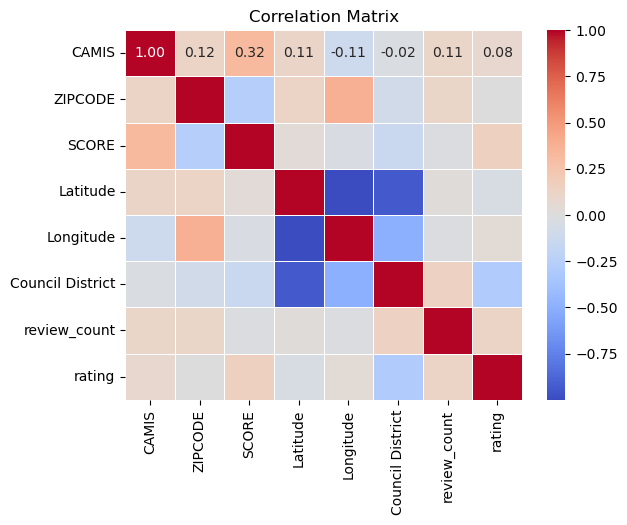

In [31]:
# Assuming 'restaurant_name' is a non-numeric column
numeric_data = mdf.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()